In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [23]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage", 
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 1 0 0 0 1 1 0 1 1 0 2 0 0 1 1 1 1 0 1 1 1 1 0 1 0 2 0 1 1]


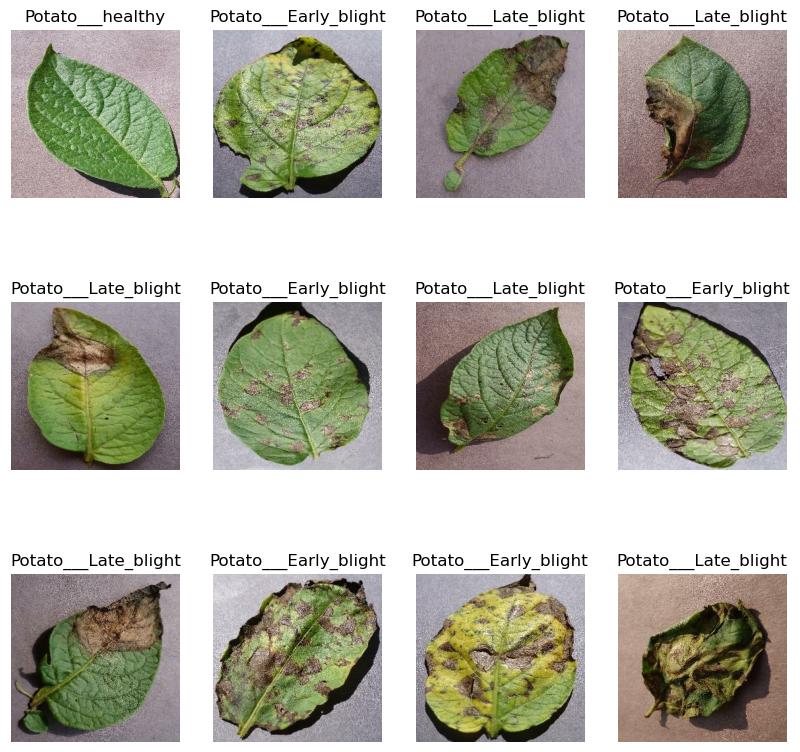

In [21]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [22]:
len(dataset)

68

In [ ]:
80% ==> training
20% ==> 10 % validation, 10% test

In [25]:
train_size = 0.8
len(dataset)
len(dataset) * train_size

54.400000000000006

In [36]:
train_ds = dataset.take(54)
len(train_ds)

54

In [37]:
test_ds = dataset.skip(54) 
len(test_ds)

14

In [38]:
val_size =0.1
len(dataset) * val_size


6.800000000000001

In [39]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [40]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [41]:
def get_dataset_partision_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size , seed = 12)
    train_size = int(train_split *ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [42]:
train_ds , cal_ds, test_ds = get_dataset_partision_tf(dataset)

In [43]:
len(train_ds)

54

In [44]:
len(val_ds)

6

In [45]:
train_ds =train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

val_ds =val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

test_ds =test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)



In [49]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [50]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])
    

In [51]:
input_shape = (BATCH_SIZE , IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),        

    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation ="relu"),
    layers.Dense(n_classes, activation = "softmax")
])

model.build(input_shape= input_shape)

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [58]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ["accuracy"]
)

In [66]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose =1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 24s 439ms/step - loss: 0.0317 - accuracy: 0.9884 - val_loss: 0.0476 - val_accuracy: 0.9896
Epoch 2/50
54/54 [==============================] - 23s 432ms/step - loss: 0.0307 - accuracy: 0.9884 - val_loss: 0.0649 - val_accuracy: 0.9688
Epoch 3/50
54/54 [==============================] - 24s 439ms/step - loss: 0.0173 - accuracy: 0.9948 - val_loss: 0.0097 - val_accuracy: 0.9948
Epoch 4/50
54/54 [==============================] - 24s 440ms/step - loss: 0.0138 - accuracy: 0.9942 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 5/50
54/54 [==============================] - 24s 442ms/step - loss: 0.0134 - accuracy: 0.9948 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 6/50
54/54 [==============================] - 24s 436ms/step - loss: 0.0151 - accuracy: 0.9942 - val_loss: 0.1838 - val_accuracy: 0.9375
Epoch 7/50
54/54 [==============================] - 24s 450ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0189 - val_accuracy: 0.9896

In [68]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 110ms/step - loss: 5.2786e-04 - accuracy: 1.0000


In [69]:
scores

[0.0005278617609292269, 1.0]

In [70]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [72]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Accuracy')

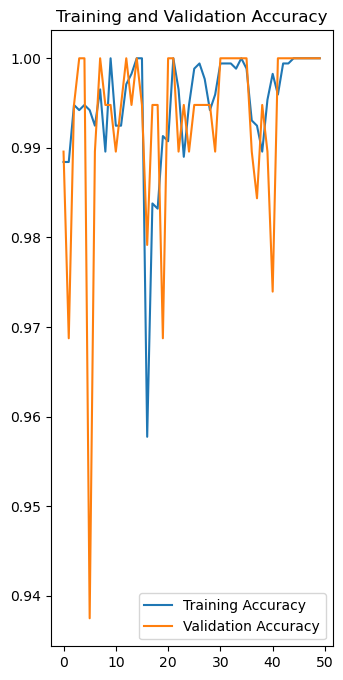

In [75]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = "Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")




Text(0.5, 1.0, 'Training and Validation loss')

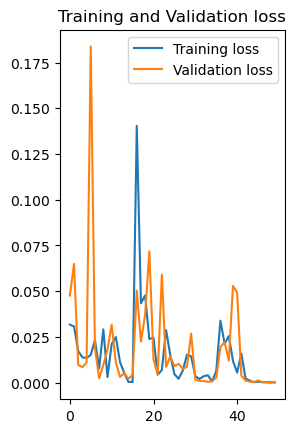

In [76]:
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label = "Training loss")
plt.plot(range(EPOCHS), val_loss, label = "Validation loss")
plt.legend(loc = "upper right")
plt.title("Training and Validation loss")

first image to predict
first image actial label: Potato___Late_blight
1/1 [==============================] - 0s 113ms/step
predicted label:  Potato___Late_blight


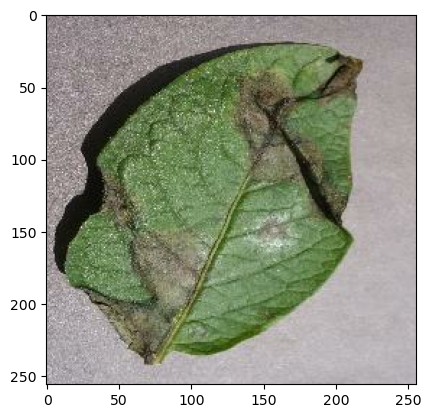

In [84]:
import numpy as np
for images_batch, label_batch, in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    
    print("first image to predict")
    
    plt.imshow(first_image)
    print("first image actial label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])
    

In [101]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 13ms/step


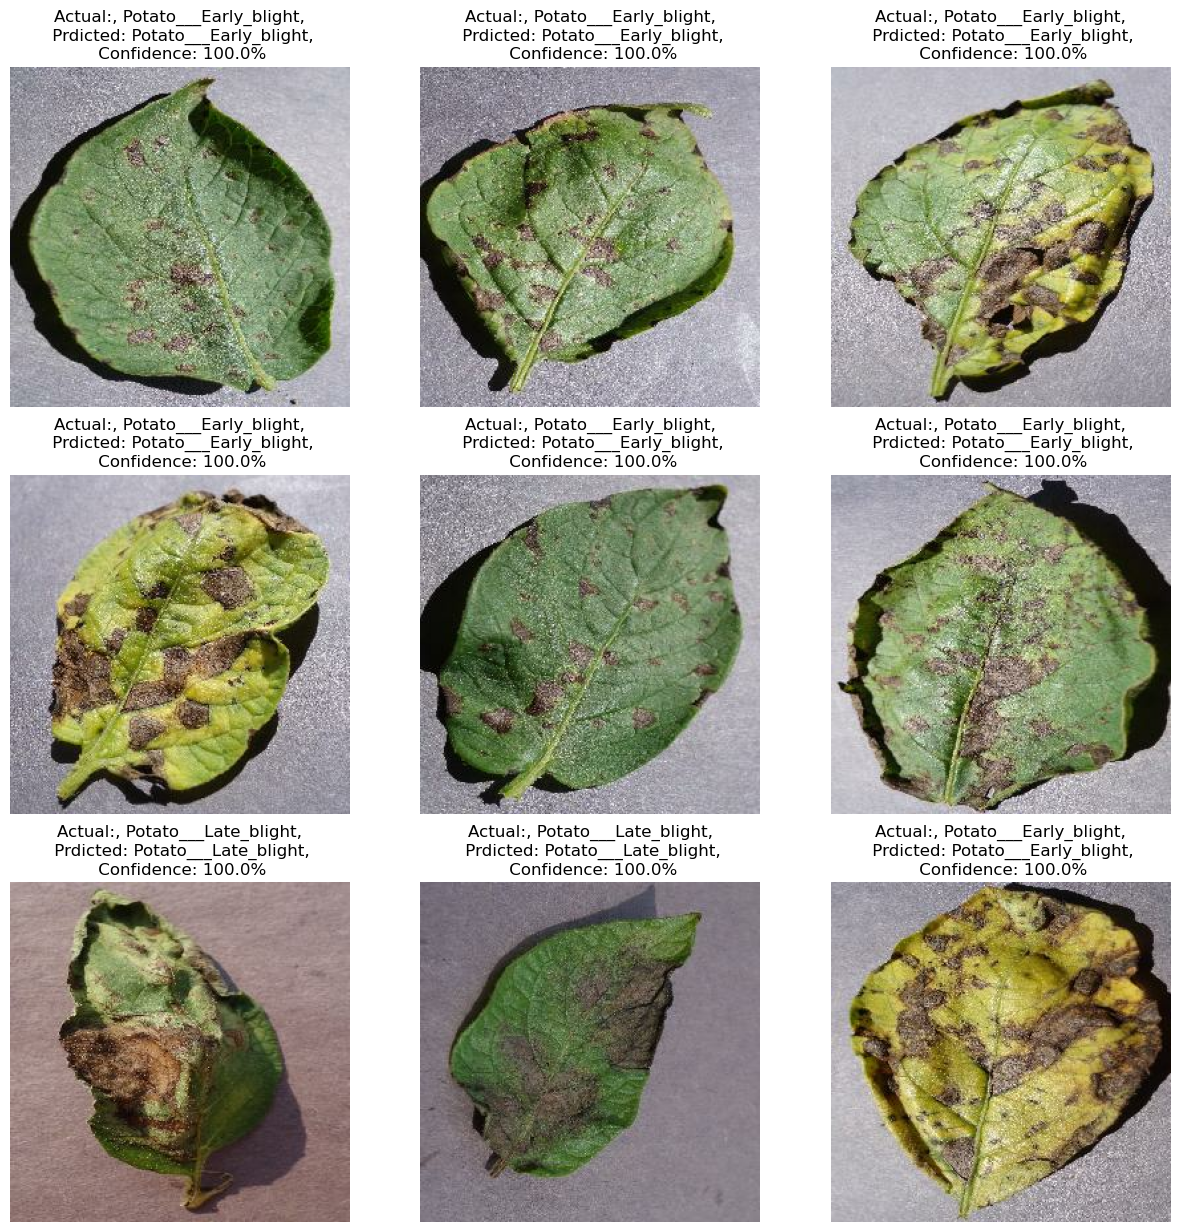

In [103]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:, {actual_class},\n Prdicted: {predicted_class},\n Confidence: {confidence}%")
        
        plt.axis("off")
        

In [104]:
model_version = 1

model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1/assets


INFO:tensorflow:Assets written to: ../models/1/assets


In [110]:
import os
model_version = max([int(i) for i in os.listdir("../models") + [0]] )+ 1

model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2/assets


INFO:tensorflow:Assets written to: ../models/2/assets
